In [7]:
# Instalación de librerias 

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from timeit import default_timer

In [8]:
class TimeSerie:

    amount_bins = 0
    period = 0
    num_periods = 0
    array_periods = []
    tensor_data = []

    # contructor
    def __init__(self,interval,amount_data):
        self.interval = interval
        self.amount_data = amount_data

        self.set_data()
        self.normalize()

    # set time and magnitud data for time serie
    def set_data(self):
        self.time_real = self.interval * np.sort(np.random.rand(self.amount_data))
        self.magnitud = np.random.randn(self.amount_data)

    # process to normalize time data in range 0 to 1
    def normalize(self):
        aux_time = self.time_real
        self.time =  (aux_time- aux_time.min())/(aux_time.max()-aux_time.min())

    # x axis
    def get_time(self):
        return self.time

    # y axis
    def get_magnitud(self):
        return self.magnitud

    # method for get tensor (mean,max,min,std for different periods)
    def get_tensor(self):
        return self.tensor_data

    def get_configuration_data(self):
        all_info = f'interval: {self.interval}\namount_data: {self.amount_data}\namount_bins: {self.amount_bins}\nperiod: {self.period}\nnum_periods: {self.num_periods}\narray_periods: {self.array_periods}\n'
        print(all_info)

    def set_params_data(self,amount_bins,period,num_periods):
        self.amount_bins = amount_bins
        self.period = period
        self.num_periods = num_periods

    def set_array_periods(self,array_periods):
        self.array_periods = array_periods

    def set_tensor(self,tensor):
        self.tensor_data = tensor

    # method for get time serie graphic
    def view_time_serie(self,rows=6,cols=16,font_size=18):
        title_figure = f'Time serie'
        plt.figure(figsize=(cols,rows))
        plt.plot(self.time,self.magnitud)
        plt.scatter(self.time,self.magnitud)
        plt.ylabel("Magnitud")
        plt.xlabel("Time")
        plt.suptitle(title_figure,fontsize=font_size)
        plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
        plt.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
        plt.show()


#Creacion de un array que contiene los T/n periodos distintos
def generate_periods(num_periods=1):
    all_period = [1]
    
    for i in range(1, num_periods):
        all_period.append(2**i)
    
    return all_period


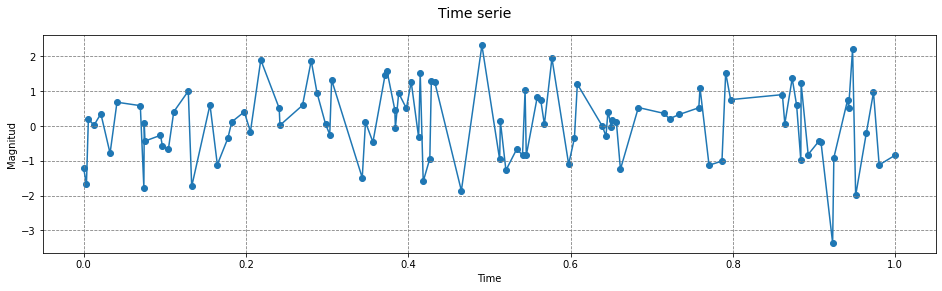

In [9]:
# Configuracion de parametros globales
# --------------------------------------
amount_bins = 10
period = 1
num_periods = 3
amount_data = 100
interval = 50

# Contructor TimeSerie()
# --------------------------------------
time_serie = TimeSerie(interval,amount_data)

# Visualizar serie de tiempo (normalizado [0,1])
time_serie.view_time_serie(4,16,14)

# Agregar paraemtros 
time_serie.set_params_data(amount_bins,period,num_periods)

# Obtencion de array con los periodos a analizar
array_periods = generate_periods(num_periods)
time_serie.set_array_periods(array_periods)


In [10]:
#Creacion del grafico aplicando el metodo de folding
def drawGraphic(bins,time,mag,indice,period):
    title_figure = f'Folded Time Serie with period T/{period}'
    #Grafico para ver la serie de tiempo 
    plt.figure(figsize=(12,4))
    plt.plot(time[indice], mag[indice])
    plt.scatter(time[indice], mag[indice])
    plt.ylabel("Magnitud")
    plt.xlabel("Time")
    plt.suptitle(title_figure, fontsize=22)
    plt.grid(axis='x', color='red', linestyle='-', linewidth=2)
    
    for bin in bins:
        plt.axvline(x=bin,color='red')

    # plt.grid(axis='y', color='gray', linestyle='dashed')
    plt.show()


def getStatistic(index,indBin,magnitud):
    #Analisis en base a la magnitud
    mag_ordered = magnitud[index]

    #Obtención de vectores con caracteristicas estadisticas
    vector_mean = np.array([np.nanmean(
        mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000  for i in range(amount_bins)])
    
    vector_max = np.array([np.nanmax(
        mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])
    
    vector_min = np.array([np.nanmin(
        mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])
    
    vector_std = np.array([np.nanstd(
        mag_ordered[indBin==(i+1)])  if (indBin==(i+1)).sum()>0 else -1000 for i in range(amount_bins)])

    return [vector_mean,vector_max,vector_min,vector_std]


def variantion_period(array_periods,time_serie):
    
    tensor_data = []

    for index, period in enumerate(array_periods):
        print(f'Periodo T/{period}')

        #valor del periodo en decimales
        period_float = 1 / period
        #proceso de folding
        folded_time = time_serie.get_time() % period_float
        #indices de los datos para encontrarlos luego del folding
        index_folded = np.argsort(folded_time)
        #Divido el periodo en bins o intervalos [0,n] para luego obtener datos estadisticos de cada bin
        bins = np.linspace(0,period_float,amount_bins+1)

        #Concentración de datos en cada bin
        concentration, bin_edges= np.histogram(folded_time[index_folded],bins=bins)
        #indices - Devuelve los índices de los bins a los que pertenece cada valor del folded_time
        index_bin = np.digitize(folded_time[index_folded],bins=bins)

        print("bins: ",bins)
        print("concentracion de datos en cada bin: ",concentration)

        #Visualizar grafico de cada variación del periodo
        drawGraphic(bins,folded_time,time_serie.get_magnitud(),index_folded,period)

        #Obtención de datos estadisticos de cada bin y formación del tensor
        vectorStatisticPeriod = np.asmatrix(getStatistic(index_folded,index_bin,time_serie.get_magnitud()))
        tensor_data.append(vectorStatisticPeriod)

        print('-'*100)

    return tensor_data
     

Periodo T/1
bins:  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
concentracion de datos en cada bin:  [14  9  8 11  9 12 10  9  7 11]


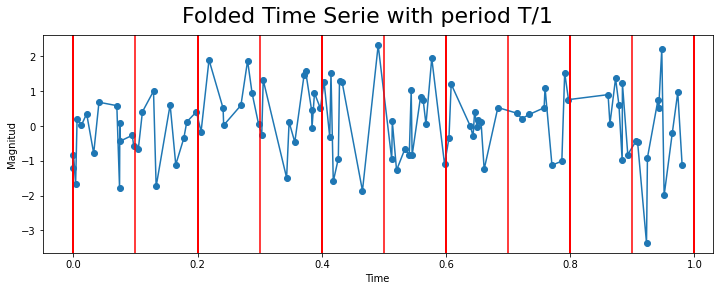

----------------------------------------------------------------------------------------------------
Periodo T/2
bins:  [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
concentracion de datos en cada bin:  [15 11  9 10  7 10  4 14 14  6]


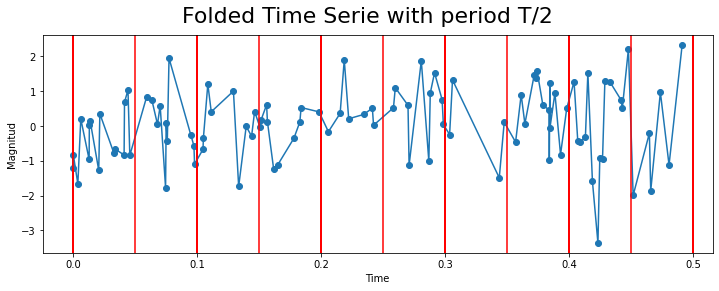

----------------------------------------------------------------------------------------------------
Periodo T/4
bins:  [0.    0.025 0.05  0.075 0.1   0.125 0.15  0.175 0.2   0.225 0.25 ]
concentracion de datos en cada bin:  [13 12  8  7 10 13 14 10  8  5]


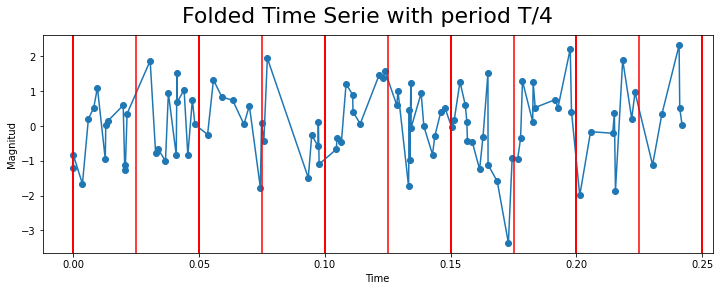

----------------------------------------------------------------------------------------------------
time method: 0.23218321799868136 with 100 data
----------------------------------------------------------------------------------------------------
TENSOR
(3, 4, 10)
[[[-0.39992554 -0.14749454  0.71545391  0.3782074   0.32792968
   -0.07763554  0.05352686  0.2974066   0.33465765 -0.36400821]
  [ 0.68248328  1.00201231  1.89852373  1.59041905  2.31943096
    1.94788652  1.20325596  1.52964597  1.36679181  2.21439199]
  [-1.77032201 -1.73796366 -0.1638782  -1.48741952 -1.85983587
   -1.27123056 -1.24356355 -1.1262385  -0.98493289 -3.35849326]
  [ 0.75503883  0.83999424  0.75479874  0.89228202  1.43646976
    0.98487056  0.60669619  0.82801779  0.87715685  1.44600491]]

 [[-0.44189297  0.00889187 -0.00394557 -0.07566722  0.4524633
    0.52330476 -0.07450353  0.48577851  0.06027286 -0.31609055]
  [ 1.03415252  1.94788652  1.20325596  0.60967476  1.89852373
    1.87435463  1.32321165  1.5904

In [11]:
start_time = default_timer()
tensor_output = np.array(variantion_period(array_periods,time_serie))
time_serie.set_tensor(tensor_output)
end_time = default_timer()

time_method = end_time - start_time

print(f'time method: {time_method} with {amount_data} data')
print('-'*100)

# print_tensor = f'''
#                 matriz 1: T [ [mean],[max],[min],[std]]
#                 matriz 2: T/2 [ [mean],[max],[min],[std]]
#                 matriz 3: T/4 [ [mean],[max],[min],[std]]
#                 matriz 1: T/8 [ [mean],[max],[min],[std]]
                
#                 '''

# print('Forma del tensor:\n',print_tensor)

print('TENSOR')
print(time_serie.get_tensor().shape)
print(time_serie.get_tensor())


In [12]:
# test para verificar el tiempo de ejecucion al analizar N series de tiempo

def test(amount):
    tensor_test = []

    amount_bins = 10
    period = 1
    num_periods = 3
    amount_data = 1000000
    interval = 50

    array_periods = generate_periods(num_periods)

    start_time = default_timer()

    for i in range(1,amount):
        aux_time_serie = TimeSerie(interval,amount_data)
        
        aux_time_serie.set_array_periods(array_periods)
        aux_time_serie.set_params_data(amount_bins,period,num_periods)

        tensor_output = np.array(variantion_period(array_periods,aux_time_serie))
        aux_time_serie.set_tensor(tensor_output)
        
        tensor_test.append(aux_time_serie.get_tensor())
        print('-'*100)
    
    
    end_time = default_timer()
    time_method = end_time - start_time

    return [time_method,tensor_test]


amount = 5
# time_method,tensor_test = test(amount)

# print(f'time_method {time_method}')
# for tensor in enumerate(tensor_test):
#     print(f'tensor_test:\n{tensor_test}')